In [1]:
import pandas as pd

In [ ]:
file = "coffeeOrdersData.xlsx"

df = pd.read_excel(file, sheet_name=None)


# df = pd.concat(df.values(), ignore_index=True)
# df = pd.concat(df.values(), keys=df.keys(), axis=1)


# -----------------------------------------------------
# No Multi-Indexing
# -----------------------------------------------------
df = pd.concat(df.values(), axis=1)
df.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Country,Coffee Type,Roast Type,...,Country,Postcode,Loyalty Card,Product ID,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,NaN,NaN,NaN,NaN,NaN,...,United States,7505,Yes,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,NaN,NaN,NaN,NaN,NaN,...,Ireland,D6W,No,A-L-0.5,Ara,L,0.5,7.770,1.5540,0.69930
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,NaN,NaN,NaN,NaN,NaN,...,United States,78205,Yes,A-L-1,Ara,L,1.0,12.950,1.2950,1.16550
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,NaN,NaN,NaN,NaN,NaN,...,United States,62711,Yes,A-L-2.5,Ara,L,2.5,29.785,1.1914,2.68065
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,NaN,NaN,NaN,NaN,NaN,...,Ireland,N41,No,A-M-0.2,Ara,M,0.2,3.375,1.6875,0.30375


In [5]:
df.describe()

,Order Date,Quantity,Customer Name,Email,Country,Coffee Type,Roast Type,Size,Unit Price,Sales,Size,Unit Price,Price per 100g,Profit
count,1000,1000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.000000,48.000000,48.000000,48.000000
mean,2020-11-06 21:07:12,3.551000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.050000,13.046250,1.435087,1.316219
min,2019-01-02 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.685000,0.823400,0.161100
25%,2019-12-17 00:00:00,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.425000,5.216250,1.191400,0.501300
50%,2020-12-02 12:00:00,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.750000,9.230000,1.370600,0.943800
75%,2021-10-02 06:00:00,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375000,17.033750,1.659375,1.657700
max,2022-08-19 00:00:00,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,36.455000,2.377500,4.739150
std,NaN,1.681733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.893951,9.953578,0.371981,1.161426


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1000 non-null   object        
 1   Order Date      1000 non-null   datetime64[ns]
 2   Customer ID     1000 non-null   object        
 3   Product ID      1000 non-null   object        
 4   Quantity        1000 non-null   int64         
 5   Customer Name   0 non-null      float64       
 6   Email           0 non-null      float64       
 7   Country         0 non-null      float64       
 8   Coffee Type     0 non-null      float64       
 9   Roast Type      0 non-null      float64       
 10  Size            0 non-null      float64       
 11  Unit Price      0 non-null      float64       
 12  Sales           0 non-null      float64       
 13  Customer ID     1000 non-null   object        
 14  Customer Name   1000 non-null   object        
 15  Email

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns[df.columns.duplicated()]

Index(['Customer ID', 'Customer Name', 'Email', 'Country', 'Product ID',
       'Coffee Type', 'Roast Type', 'Size', 'Unit Price'],
      dtype='object')

In [9]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [10]:
df.columns[df.isna().all()]

Index(['Customer Name', 'Email', 'Country', 'Coffee Type', 'Roast Type',
       'Size', 'Unit Price', 'Sales'],
      dtype='object')

In [11]:
df = df.dropna(axis=1, how='all')

In [12]:
sales = (df['Unit Price'] * df['Quantity']).round(2)

df.insert(19, 'Sales', sales)
df['Sales'].head()

0     7.77
1    38.85
2    12.95
3    59.57
4     6.75
Name: Sales, dtype: float64

In [13]:
coffee_types = {'Ara': 'Arabica', 'Exc': 'Excelsa', 'Lib': 'Liberica', 'Rob': 'Robusta'}

for old_val, new_val in coffee_types.items():
    df.loc[df['Coffee Type'] == old_val, 'Coffee Type'] = new_val

df['Coffee Type'].unique()

array(['Arabica', 'Robusta', 'Liberica', 'Excelsa', nan], dtype=object)

In [14]:
roast_types = {'L': 'Light', 'M': 'Medium', 'D': 'Dark'}

for old_val, new_val in roast_types.items():
    df.loc[df['Roast Type'] == old_val, 'Roast Type'] = new_val

df['Roast Type'].unique()

array(['Light', 'Medium', 'Dark', nan], dtype=object)

In [15]:
df = df.fillna("")
df.isna().sum()

Order ID          0
Order Date        0
Customer ID       0
Product ID        0
Quantity          0
Customer ID       0
Customer Name     0
Email             0
Phone Number      0
Address Line 1    0
City              0
Country           0
Postcode          0
Loyalty Card      0
Product ID        0
Coffee Type       0
Roast Type        0
Size              0
Unit Price        0
Sales             0
Price per 100g    0
Profit            0
dtype: int64

In [16]:
for x in df.index:
    if df.loc[x, 'Sales'] == "":
        df.drop(x, inplace=True)

df.reset_index()
df[df['Sales'] == ""]

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer ID,Customer Name,Email,Phone Number,Address Line 1,...,Postcode,Loyalty Card,Product ID,Coffee Type,Roast Type,Size,Unit Price,Sales,Price per 100g,Profit


---

Sales Over Time

In [17]:
df['Month'] = df['Order Date'].dt.strftime('%b')
df['Year'] = df['Order Date'].dt.strftime('%Y')

df[['Month', 'Year']].head()

,Month,Year
0,Sep,2019
1,Sep,2019
2,Jun,2021
3,Jul,2021
4,Jul,2021


In [18]:
sales_by_month = df.loc[:, ['Sales', 'Month']]
sales_by_month['Month'].value_counts()

Month
Sep    7
Jun    6
Jul    5
Oct    5
Apr    5
Jan    4
Feb    4
May    3
Dec    3
Aug    2
Mar    2
Nov    2
Name: count, dtype: int64

In [19]:
sales_by_month.groupby('Month').sum().unstack()['Sales']

Month
Apr     156.5
Aug     33.35
Dec    157.38
Feb    189.57
Jan    122.25
Jul    139.59
Jun    502.47
Mar     57.71
May     81.46
Nov    229.23
Oct    424.29
Sep     354.2
dtype: object

In [20]:
total_sales = df.groupby(['Year', 'Month']) \
    .agg({'Sales': 'sum', 'Coffee Type': 'first'}).reset_index()

total_sales.sort_values(by=['Year'], inplace=True)
total_sales.head()

,Year,Month,Sales,Coffee Type
0,2019,Apr,26.73,Excelsa
1,2019,Feb,98.32,Liberica
2,2019,Jan,8.96,Arabica
3,2019,Jun,95.69,Robusta
4,2019,Mar,17.91,Robusta


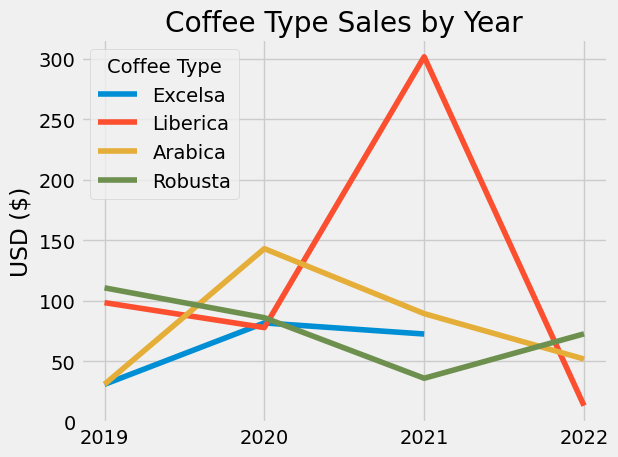

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')


plt.plot(figsize=(12, 6))

sns.lineplot(x='Year', y='Sales', hue='Coffee Type', data=total_sales, errorbar=None, dashes=True)

plt.title('Coffee Type Sales by Year')
plt.xlabel('')
plt.ylabel('USD ($)')

plt.tight_layout()
plt.show()


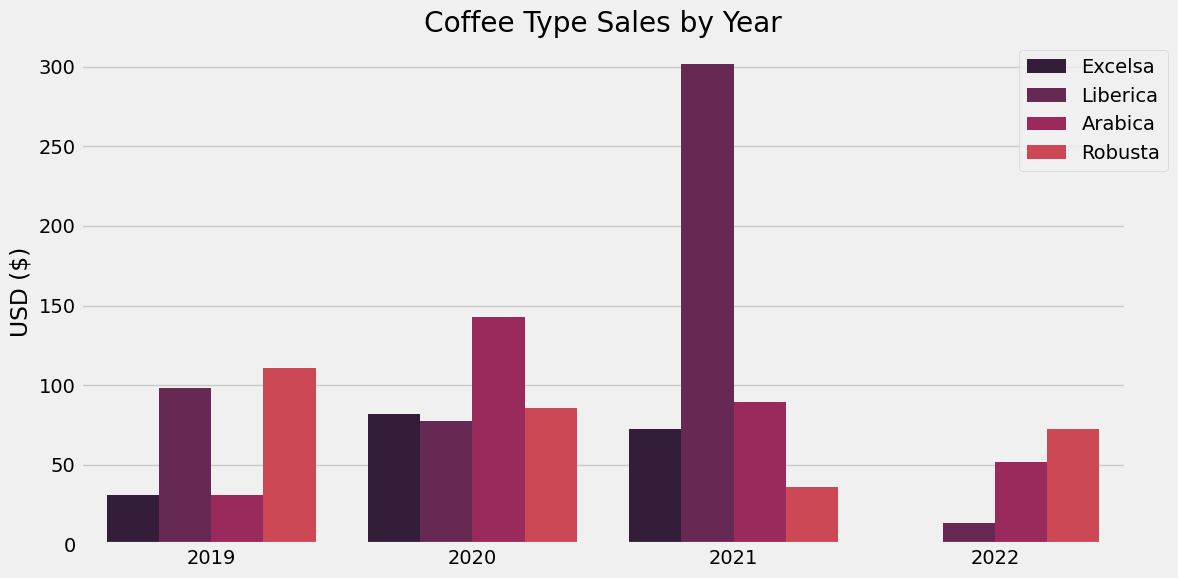

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')


plt.figure(figsize=(12, 6))
sns.set_palette('rocket')


sns.barplot(x='Year', y='Sales', hue='Coffee Type', data=total_sales, errorbar=None)

plt.title('Coffee Type Sales by Year')
plt.xlabel('')
plt.ylabel('USD ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')

plt.tight_layout()
plt.show()

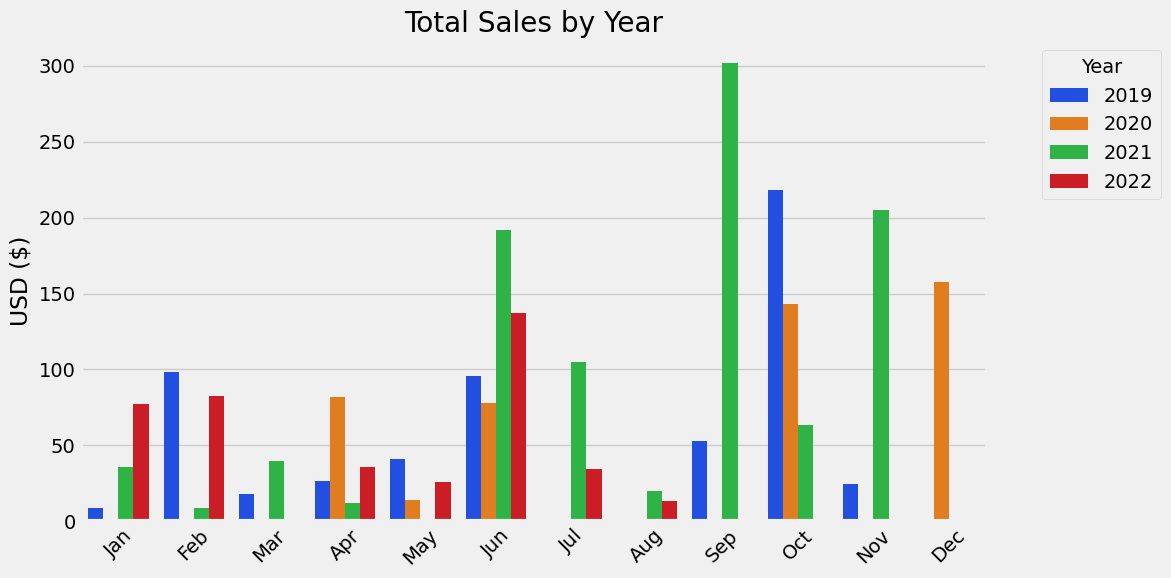

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.style.use('fivethirtyeight')
sns.set_palette('bright')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(12, 6))

sns.barplot(x='Month', y='Sales', hue='Year', data=total_sales, order=months)

plt.title('Total Sales by Year')
plt.xlabel('')
plt.ylabel('USD ($)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Sales By Country

In [25]:
df['Country'].unique()

array(['United States', 'Ireland', 'United Kingdom'], dtype=object)

In [26]:
countries = df.groupby('Country')['Sales'].sum().reset_index()
countries

,Country,Sales
0,Ireland,375.61
1,United Kingdom,77.7
2,United States,1994.69


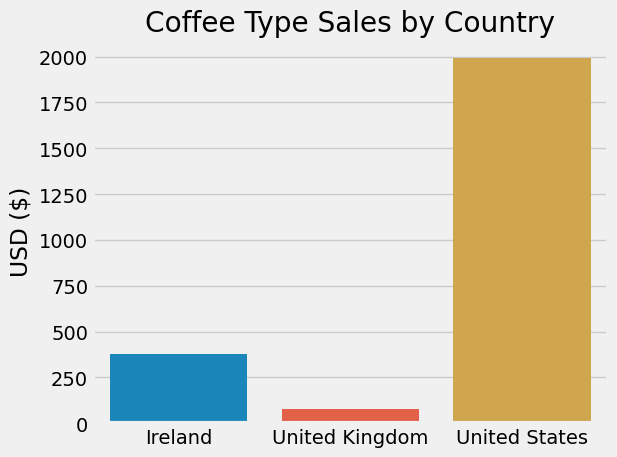

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')


plt.plot(figsize=(12, 6))

sns.barplot(x='Country', y='Sales', data=countries, errorbar=None)

plt.title('Coffee Type Sales by Country')
plt.xlabel('')
plt.ylabel('USD ($)')

plt.tight_layout()
plt.show()

Top 5 Customers

In [28]:
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

top_5_customers = df.groupby('Customer Name')['Sales'].sum().nlargest(5).reset_index()
top_5_customers

,Customer Name,Sales
0,Hy Zanetto,204.93
1,Ray Leivesley,200.79
2,Vivie Danneil,182.27
3,Faber Eilhart,178.71
4,Llywellyn Oscroft,137.42


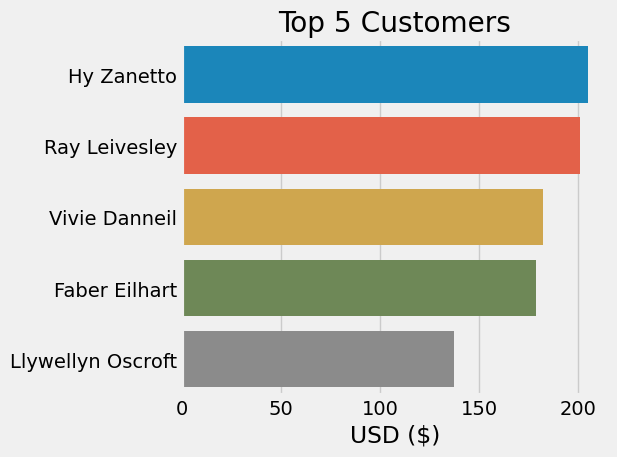

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_color_codes('pastel')

plt.plot(figsize=(6, 12))

sns.barplot(x='Sales', y='Customer Name', data=top_5_customers, errorbar=None)

plt.title('Top 5 Customers')
plt.xlabel('USD ($)')
plt.ylabel('')

# plt.xticks(rotation=90)
# plt.ylim(0, 300)

plt.tight_layout()
plt.show()

In [30]:
top_5_customers['Sales']

0    204.93
1    200.79
2    182.27
3    178.71
4    137.42
Name: Sales, dtype: float64